# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

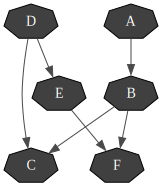

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)


A:Range([0,1])
<> : [[0.477627 , 0.522373] , [0.477502 , 0.522498]]

B:Range([0,1])
<A:0> : [[0.740112 , 0.259888] , [0.740109 , 0.259891]]
<A:1> : [[0.181894 , 0.818106] , [0.130161 , 0.869839]]

C:Range([0,1])
<B:0|D:0> : [[0.798963 , 0.201037] , [0.798962 , 0.201038]]
<B:1|D:0> : [[0.244341 , 0.755659] , [0.237128 , 0.762872]]
<B:0|D:1> : [[0.460758 , 0.539242] , [0.460595 , 0.539405]]
<B:1|D:1> : [[0.236403 , 0.763597] , [0.227867 , 0.772133]]

D:Range([0,1])
<> : [[0.403444 , 0.596556] , [0.403034 , 0.596966]]

E:Range([0,1])
<D:0> : [[0.640627 , 0.359373] , [0.640616 , 0.359384]]
<D:1> : [[0.245979 , 0.754021] , [0.239006 , 0.760994]]

F:Range([0,1])
<E:0|B:0> : [[0.695332 , 0.304668] , [0.695327 , 0.304673]]
<E:1|B:0> : [[0.420242 , 0.579758] , [0.419931 , 0.580069]]
<E:0|B:1> : [[0.352903 , 0.647097] , [0.351943 , 0.648057]]
<E:1|B:1> : [[0.501186 , 0.498814] , [0.501099 , 0.498901]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [5]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [6]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()